In [2007]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

##### Sistema de ecuaciones

$$
\frac{dy}{dt} = -k_{a}y,\hspace{5mm}k_{a} > 0
$$

$$
\frac{dx}{dt} = \frac{k_{a}}{V}y - k_{e}x, \hspace{5mm} k_{e} > 0
$$

Sistema resuelto

$$
\begin{equation}
    x\left(t\right) = \frac{k_a y_0}{V\left(k_a - k_e\right)}\left(e^{-k_e t} - e^{-k_a t}\right)
\end{equation}
$$
$$
\begin{equation}
    y_n\left(t\right) = y_0 \left(\frac{1 -\alpha^n}{1-\alpha}\right)e^{-k_a \left(t-\left(n-1\right)t_0\right)}
\end{equation}
$$

In [2008]:
# Modelo basado en la farmacocinética de la amoxacilina según los datos de:

# http://www.facmed.unam.mx/bmnd/gi_2k8/prods/PRODS/15.HTM#:~:text=FARMACOCINÉTICA%20Y%20FARMACODINAMIA%3A&text=Se%20absorbe%20rápidamente%20después%20de,AMOXICILINA%20es%20de%2061.3%20minutos.
# https://cima.aemps.es/cima/dochtml/ft/62459/FT_6245#:~:text=De%20250%20mg%20a%20500,al%20día%2C%20durante%20un%20día.&text=500%20mg%20cada%208%20horas%2C%20de%20750%20mg,1%20g%20cada%2012%20horas.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC283758/#:~:text=The%20absorption%20rate%20constant%2C%20kappa,half-life%20was%200.72%20h.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC283758/pdf/aac00382-0105.pdf


# FORMA FARMACÉUTICA Y FORMULACIÓN:

# Cada CÁPSULA contiene:

# Amoxicilina tetrahidratada
# equivalente a..............................250 y 500 mg
# de amoxicilina

# La administración de AMOXICILINA por vía oral en cápsulas con dosis de 250 y 500 mg, 
# alcanza un nivel sanguíneo máximo entre 1 y 2 horas después de la administración, en 
# un margen que va de 3.5 a 5.0 mcg/ml y de 5.5 a 7.5 mcg/ml, respectivamente.

# 1 microgramo/mililitro = 1 miligramo/litro

X0 = 0      # miligramo/L ; Es la dosis inicial del antibiótico en sangre
Y0 = 500    # miligramo ; Es la dosis inicial del antibiótico en estómago

t0 = 8    # Horas

ka = 2.9      # horas^-1; +- 0.17
ke = 0.1     # horas^-1; +- 0.15
V = 5.5     # litros de sangre promedio según el rango de (3.5 - 6.0)

n = 7
n_dosis = 3 * n

In [2009]:
def model(c, t):
    y = c[0]
    x = c[1]
    dydt = -ka * y
    dxdt = ((ka / V) * y) - (ke * x)
    return np.array([dydt, dxdt])

step = 0.001
dosis_arr_2 = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n_dosis)])

t = np.arange(0, t0, step)
ysol = []
c0 = np.array([Y0, X0])

for i in range(len(dosis_arr_2)):
    ysol.append(odeint(model, c0, dosis_arr_2[i]))
    c0 = np.array([Y0 + ysol[-1][-1][0], X0 + ysol[-1][-1][1]])

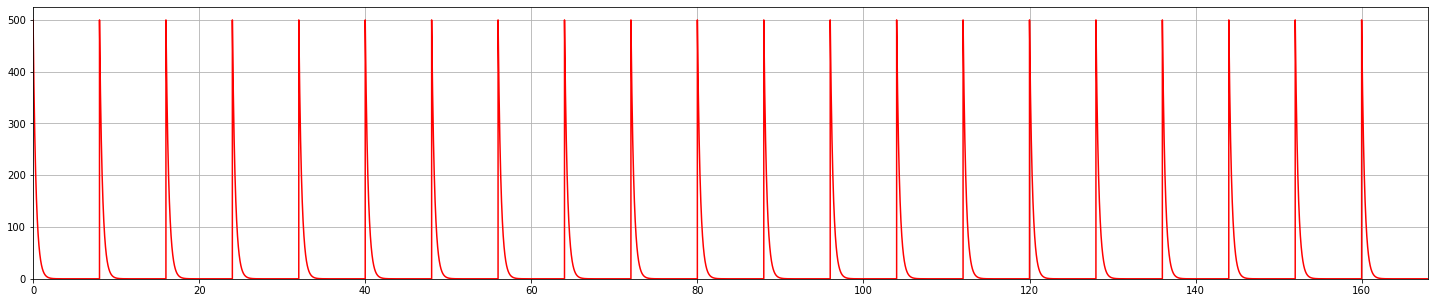

In [2010]:
t = np.concatenate(dosis_arr_2)
y = np.concatenate(ysol)[ : ,0]
x = np.concatenate(ysol)[ : ,1]
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(t, y, 'r')
plt.xlim(0, t0*n_dosis)
plt.ylim(0)
plt.grid(True)

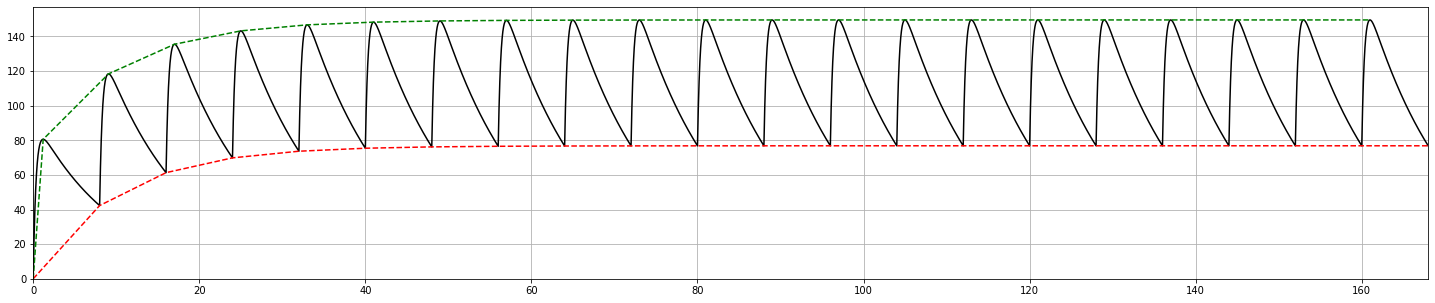

In [2030]:
ll = np.concatenate([x[np.where(t == dosis_arr_2[i][-1] if i >= 0 else t == 0.)] for i in range(-1, len(dosis_arr_2))])
lt = np.concatenate([t[np.where(t == dosis_arr_2[i][-1] if i >= 0 else t == 0.)] for i in range(-1, len(dosis_arr_2))])

hl = np.append(np.array([np.max(x[len(dosis_arr_2) * i: (len(dosis_arr_2[i]) * i) + 1 ]) for i in range(0, len(dosis_arr_2))]), np.max(x[:-len(dosis_arr_2)]))
ht = np.concatenate([t[np.where(x == hl[i])] for i in range(len(hl))])
tt = np.mean([ht, lt], axis=0)

fig, ax = plt.subplots(figsize=(25,5))
plt.plot(t, x, 'k')
plt.plot(lt,ll, '--', color='red')
plt.plot(ht, hl, '--', color='green')
plt.xlim(0, t0*n_dosis)
plt.ylim(0)
plt.grid(True)

In [2012]:
hl = np.append(np.array([np.max(x[len(dosis_arr_2) * i: (len(dosis_arr_2[i]) * i) + 1 ]) for i in range(0, len(dosis_arr_2))]), np.max(x[:-len(dosis_arr_2)]))
hl.shape

(22,)

In [2013]:
ht = np.concatenate([t[np.where(x == hl[i])] for i in range(len(hl))])
ht.shape

(22,)

In [2024]:
tt = np.mean([ht, lt], axis=0)
tt

array([  0.    ,   4.601 ,  12.5345,  20.511 ,  28.5015,  36.4975,
        44.4955,  52.495 ,  60.4945,  68.4945,  76.4945,  84.4945,
        92.4945, 100.4945, 108.4945, 116.4945, 124.494 , 132.494 ,
       140.494 , 148.494 , 156.494 , 164.494 ])